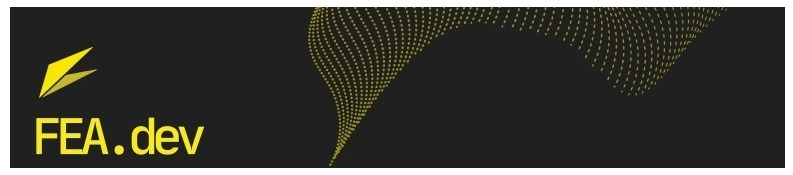

## Lista de exercícios 05 - Semana 03

Conteúdo do MÓDULO 3:

-Pandas I

Para esta lista de exercícios utilizaremos uma base de dados contendo informações sobre a performance de alunos em exames
. A base de dados está disponível para download na plataforma Kaggle a partir do link abaixo:

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## QUESTÃO 0

Carregue os dados do arquivo "StudentPerformance.csv" em um DataFrame com nome "df" e mostre as suas primeiras 10 linhas. 
<br>
*Certifique-se de que o arquivo se encontra no mesmo diretório da lista 5.

In [2]:
import pandas as pd

#seu código começa aqui

df = pd.read_csv("StudentsPerformance.csv")

df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Agora mostre as 10 **últimas** linhas do DataFrame.

In [3]:
# Exibindo as 10 últimas linhas
df.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


## QUESTÃO 1

**Exploração Inicial dos Dados**

a) Verifique o número de linhas e colunas no DataFrame. **(.shape)**

In [5]:
#SEU CÓDIGO COMEÇA AQUI
df.shape

(1000, 8)

b) Liste as colunas presentes no DataFrame. **(.columns)**

In [6]:
#SEU CÓDIGO COMEÇA AQUI
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

c) Verifique se há valores nulos em cada coluna.

In [12]:
#Exibindos os valores nulos, em que: False = não há valor nulo e True = há valor nulo
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


## QUESTÃO 2

a) Antes de começarmos a trabalhar com os dados é preciso descartar dados que não serão utilizados em nossa análise. Utilize a lista abaixo para remover colunas irrelevantes.

In [20]:
remover = ["parental level of education","lunch"]

#SEU CÓDIGO COMEÇA AQUI
df.drop(["parental level of education","lunch"], axis=1, inplace=True)

KeyError: "['parental level of education', 'lunch'] not found in axis"

b) Agora utilize o dicionário abaixo para renomear as colunas restantes.

In [35]:
nome_colunas = {
    "gender": "Gênero",
    "race/ethinicity": "Raça/Etnia",
    "test preparation course": "Curso_Prep",
    "math score" : "Nota_Matemática",
    "reading score":"Nota_Leitura",
    "writing score" : "Nota_Redação"
}

#SEU CÓDIGO COMEÇA AQUI
dados = df.rename(columns=nome_colunas)
print(dados)

     Gênero race/ethnicity Curso_Prep  Nota_Matemática  Nota_Leitura  \
0    female        group B       none               72            72   
1    female        group C  completed               69            90   
2    female        group B       none               90            95   
3      male        group A       none               47            57   
4      male        group C       none               76            78   
..      ...            ...        ...              ...           ...   
995  female        group E  completed               88            99   
996    male        group C       none               62            55   
997  female        group C  completed               59            71   
998  female        group D  completed               68            78   
999  female        group D       none               77            86   

     Nota_Redação  
0              74  
1              88  
2              93  
3              44  
4              75  
..            .

## QUESTÃO 3

Crie um DataFrame com as estatísticas descritivas de cada coluna com valores númericos. Estatísticas descritivas incluem dados como: média, mediana, desvio padrão, mínimo e máximo para cada uma dessas colunas.

In [24]:
#SEU CÓDIGO COMEÇA AQUI
infos_estat = dados.describe()
print(infos_estat)

       Nota_Matemática  Nota_Leitura  Nota_Redação
count       1000.00000   1000.000000   1000.000000
mean          66.08900     69.169000     68.054000
std           15.16308     14.600192     15.195657
min            0.00000     17.000000     10.000000
25%           57.00000     59.000000     57.750000
50%           66.00000     70.000000     69.000000
75%           77.00000     79.000000     79.000000
max          100.00000    100.000000    100.000000


## QUESTÃO 4

Crie um novo DataFrame contendo apenas os alunos que tiveram nota maior que a média em todos os exames chamado "df_acima_media". Mostre o DataFrame resultante e quantos dos alunos totais estão na nova tabela.

In [40]:
# Calculando as médias
media1 = dados['Nota_Matemática'].mean()
media2 = dados['Nota_Leitura'].mean()
media3 = dados['Nota_Redação'].mean()

# Criando o novo DataFrame
df_acima_media = (dados['Nota_Matemática'] > media1)&(dados['Nota_Leitura'] > media2)&(dados['Nota_Redação'] > media3)
print(dados[df_acima_media])
nova_tabela = (374/1000*100)
print(f'Alunos acima da média em todas as disciplinas: {nova_tabela}%')

     Gênero race/ethnicity Curso_Prep  Nota_Matemática  Nota_Leitura  \
0    female        group B       none               72            72   
1    female        group C  completed               69            90   
2    female        group B       none               90            95   
4      male        group C       none               76            78   
5    female        group B       none               71            83   
..      ...            ...        ...              ...           ...   
989  female        group D  completed               67            86   
990    male        group E  completed               86            81   
995  female        group E  completed               88            99   
998  female        group D  completed               68            78   
999  female        group D       none               77            86   

     Nota_Redação  
0              74  
1              88  
2              93  
4              75  
5              78  
..            .

## QUESTÃO 5

Crie uma nova coluna no Dataframe "df" com o nome "Nota_Geral" que represente a média da nota de cada aluno nas 3 disciplinas. Utilize esta nova coluna para ordenar os alunos de acordo com sua nota de forma que o aluno com maior nota geral esteja na primeira linha do DataFrame.

In [ ]:
#SEU CÓDIGO COMEÇA AQUI

## QUESTÃO 6

a) Conte quantos dos alunos pertencem a cada gênero.

In [ ]:
#SEU CÓDIGO COMEÇA AQUI

b) Conte quantos dos alunos pertencem a cada Raça/Etnia.

In [ ]:
#SEU CÓDIGO COMEÇA AQUI

c) Conte quantos dos alunos realizaram ou não algum curso preparatório.

In [ ]:
#SEU CÓDIGO COMEÇA AQUI

## QUESTÃO 7

Neste exercício deseja-se observar se o gênero de um aluno tem influência sobre seu acesso a cursos preparatórios. Para realizar esta tarefa agrupe os alunos de acordo com seus respectivos genêros (.groupby) e obtenha as proporções daqueles que realizaram algum curso e aqueles que não para cada um dos grupos (para obter a contagem da frequência relativa de um valor utilize **normalize=True**).

In [20]:
#SEU CÓDIGO COMEÇA AQUI

gender = df.groupby('gender')

media = gender["test preparation course"].value_counts(normalize=True)

media


gender  test preparation course
female  none                       0.644788
        completed                  0.355212
male    none                       0.639004
        completed                  0.360996
Name: proportion, dtype: float64

## QUESTÃO 8

Neste exercício deseja-se observar qual das disciplinas examindas (Matemática, Leitura, Redação) é mais influenciada por cada um dos fatores qualitivos (Gênero, Raça/Etnia, Realização de Curso Preparatório). Para isso, agrupe a base de dados para cada um dos fatores qualitativos e calcule a diferença entre a maior e menor nota média em cada uma das disciplinas. A disciplina que possuir maior diferença entre as notas médias será considerada a mais influenciada.

a) Qual disciplina possui a maior diferença entre as notas médias de homens e mulheres?

In [ ]:
#SEU CÓDIGO COMEÇA AQUI

b) Qual disciplina possui a maior diferença entre a maior e menor nota média dentre as diferentes Raças/Etnias?

In [ ]:
#SEU CÓDIGO COMEÇA AQUI

c) Qual disciplina possuir a maior diferença entre as notas médias daqueles que realizaram ou não cursos preparatórios?

In [ ]:
#SEU CÓDIGO COMEÇA AQUI

## QUESTÃO 9

Neste exercício deseja-se observar qual dos fatores qualitativos (Gênero, Raça/Etnia, Realização de Curso Preparatório) possui maior discrepância de desempenho entre suas categorias para a nota geral do exame. Para isso, calcule a diferença entre a maior e menor nota média para cada um dos fatores e indique qual teve maior diferença. Utilize as funções (.groupby) e (.mean).

Qual das colunas possui maior discrepância para as Notas Gerais?

In [ ]:
#SEU CÓDIGO COMEÇA AQUI